Pratyush and Yash

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **Importing Necessary Libraries**

In [ ]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import pickle
import seaborn as sns

In [ ]:
from scipy.sparse import csr_matrix

In [ ]:
from scipy import sparse 

*First part: We will explore the datasets, understand the context, check the data and clean the dataset*

## **Reading all the datasets**

**--Business dataset--**

In [ ]:
business_csv=pd.read_csv("/content/drive/MyDrive/csv/business.csv")

In [ ]:
business_csv_plotting=pd.read_csv("/content/drive/MyDrive/csv/business.csv")

**Checking different types of business on the basis of categories**

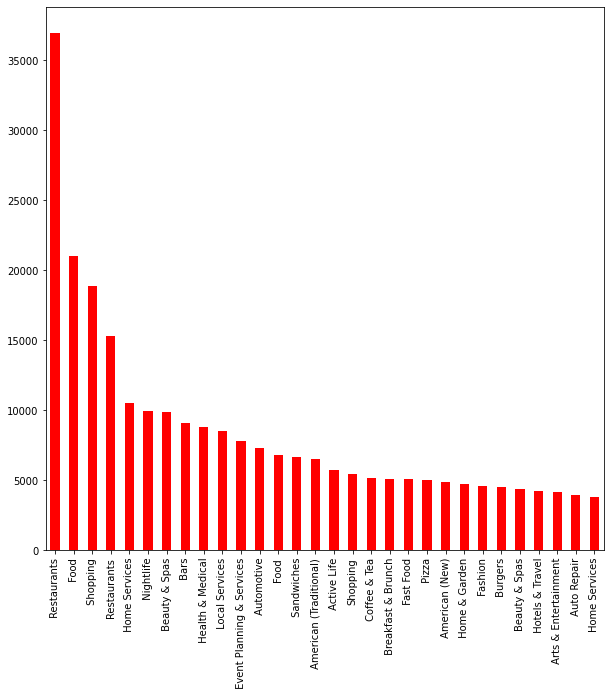

In [ ]:
fig,ax=plt.subplots(1,1,figsize=(10,10))
uniq_cat_dict = {}
for i in business_csv_plotting.categories:
    cat = str(i).split(',')
    for j in cat:
        if j not in uniq_cat_dict.keys():
            uniq_cat_dict[j] = 1
        else:
            uniq_cat_dict[j] += 1
uniq_cat_series = pd.Series(uniq_cat_dict)
uniq_cat_series.sort_values(ascending = False, inplace = True)
uniq_cat_series[:30].plot(kind = 'bar',color='r')
plt.title("Frequecy of category of business'")

Note:From the above plot, we can see that restaurants is the most frequent business category 

**Checking the most reviewed business below**

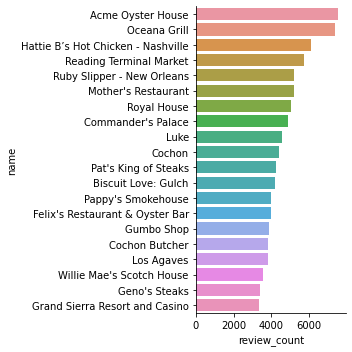

In [ ]:
ax = sns.catplot(x="review_count", y="name",data= business_csv_plotting.nlargest(20,'review_count'), 
                 kind="bar")

In [ ]:
business_csv_plotting.shape

(150346, 15)

In [ ]:
business_csv.head()

,Unnamed: 0,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
0,0,Pns2l4eNsfO8kk83dixA6A,"Abby Rappoport, LAC, CMQ","1616 Chapala St, Ste 2",Santa Barbara,CA,93101,34.426679,-119.711197,5.0,7,0,{'ByAppointmentOnly': 'True'},"Doctors, Traditional Chinese Medicine, Naturop...",NaN
1,1,mpf3x-BjTdTEA3yCZrAYPw,The UPS Store,87 Grasso Plaza Shopping Center,Affton,MO,63123,38.551126,-90.335695,3.0,15,1,{'BusinessAcceptsCreditCards': 'True'},"Shipping Centers, Local Services, Notaries, Ma...","{'Monday': '0:0-0:0', 'Tuesday': '8:0-18:30', ..."
2,2,tUFrWirKiKi_TAnsVWINQQ,Target,5255 E Broadway Blvd,Tucson,AZ,85711,32.223236,-110.880452,3.5,22,0,"{'BikeParking': 'True', 'BusinessAcceptsCredit...","Department Stores, Shopping, Fashion, Home & G...","{'Monday': '8:0-22:0', 'Tuesday': '8:0-22:0', ..."
3,3,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,PA,19107,39.955505,-75.155564,4.0,80,1,"{'RestaurantsDelivery': 'False', 'OutdoorSeati...","Restaurants, Food, Bubble Tea, Coffee & Tea, B...","{'Monday': '7:0-20:0', 'Tuesday': '7:0-20:0', ..."
4,4,mWMc6_wTdE0EUBKIGXDVfA,Perkiomen Valley Brewery,101 Walnut St,Green Lane,PA,18054,40.338183,-75.471659,4.5,13,1,"{'BusinessAcceptsCreditCards': 'True', 'Wheelc...","Brewpubs, Breweries, Food","{'Wednesday': '14:0-22:0', 'Thursday': '16:0-2..."


In [ ]:
#Checking shape

business_csv.shape

In [ ]:
#Checking the percentage of null values in business dataset
business_csv.isnull().sum()/business_csv.shape[0]

Unnamed: 0      0.000000
business_id     0.000000
name            0.000000
address         0.034101
city            0.000000
state           0.000000
postal_code     0.000486
latitude        0.000000
longitude       0.000000
stars           0.000000
review_count    0.000000
is_open         0.000000
attributes      0.091416
categories      0.000685
hours           0.154464
dtype: float64

**Note:**  *We will filter our dataset such that categories column such that categories column cells have restaurant and food as values only disregarding other categories*

In [ ]:
for i in range(len(business_csv.categories)):
    if "Food" not in str(business_csv.categories[i]).split(",") and "Restaurants" not in str(business_csv.categories[i]).split(",") :
      business_csv.drop(i,inplace=True)

In [ ]:
# Resetting index for business dataset
business_csv.reset_index(drop=True, inplace=True)

In [ ]:
business_csv.isnull().sum()/business_csv.shape[0]

In [ ]:
#Saving the file
business_restaurants=business_csv
business_restaurants.to_pickle('business_only_restaurant')  

In [ ]:
business_restaurants = pd.read_pickle('/content/business_only_restaurant')

**Note:** *We will drop address and postal_code has we will get same information from longitude and latidude values*

In [ ]:
# Dropping redundant columns
business_restaurants.drop(['address','postal_code'],axis=1,inplace=True)

**Note:** *Here, we are replacing nan values in hours column with a standard time for which restaurants are open*

In [ ]:
Bvalue = {'Monday': '7:0-20:0', 'Tuesday': '7:0-20:0', 'Wednesday': '7:0-20:0', 'Thursday': '7:0-20:0', 'Friday': '7:0-21:0', 'Saturday': '7:0-21:0', 'Sunday': '7:0-21:0'}
business_restaurants['hours']=business_restaurants['hours'].apply(lambda x: x if x == x else Bvalue)

In [ ]:
# There are no null values in hours column
business_restaurants['hours'].isnull().sum()

0

**Note:** *Filling nan with mode value in attributes column for business dataset*

In [ ]:
mode_attribute={'RestaurantsDelivery': 'True', 'RestaurantsTakeOut': 'True'}
business_restaurants['attributes']=business_restaurants['attributes'].apply(lambda x: x if x == x else mode_attribute)

In [ ]:
# We can see that there are no null values
business_restaurants['attributes'].isnull().sum()

0

**--Checkin dataset--**

In [ ]:
# Reading the checkin dataset
checking_csv=pd.read_csv("/content/drive/MyDrive/csv/checkin.csv")

In [ ]:
checking_csv.head()

,Unnamed: 0,business_id,date
0,1,--0iUa4sNDFiZFrAdIWhZQ,"2010-09-13 21:43:09, 2011-05-04 23:08:15, 2011..."
1,2,--30_8IhuyMHbSOcNWd6DQ,"2013-06-14 23:29:17, 2014-08-13 23:20:22"
2,3,--7PUidqRWpRSpXebiyxTg,"2011-02-15 17:12:00, 2011-07-28 02:46:10, 2012..."
3,5,--8IbOsAAxjKRoYsBFL-PA,"2015-06-06 01:03:19, 2015-07-29 16:50:58, 2015..."
4,7,--ARBQr1WMsTWiwOKOj-FQ,"2014-12-12 00:44:23, 2015-01-09 00:19:52, 2015..."


In [ ]:
checking_csv.shape

**Here we are only considering those business' that are still operating. We have assumed any checkin from 2019 to 2022.**

In [ ]:
for i in range(len(checking_csv)):
  if int(checking_csv['date'][i].split(',')[-1].split('-')[0].strip()) not in [2019,2020,2021,2022]:
    checking_csv.drop([i],inplace=True)

In [ ]:
checking_csv.shape

(47099, 3)

In [ ]:
checking_csv.head(10)

,Unnamed: 0,business_id,date
1,1,--0iUa4sNDFiZFrAdIWhZQ,"2010-09-13 21:43:09, 2011-05-04 23:08:15, 2011..."
2,2,--30_8IhuyMHbSOcNWd6DQ,"2013-06-14 23:29:17, 2014-08-13 23:20:22"
3,3,--7PUidqRWpRSpXebiyxTg,"2011-02-15 17:12:00, 2011-07-28 02:46:10, 2012..."
5,5,--8IbOsAAxjKRoYsBFL-PA,"2015-06-06 01:03:19, 2015-07-29 16:50:58, 2015..."
7,7,--ARBQr1WMsTWiwOKOj-FQ,"2014-12-12 00:44:23, 2015-01-09 00:19:52, 2015..."
8,8,--FWWsIwxRwuw9vIMImcQg,"2010-09-11 16:28:39, 2010-12-22 21:14:19, 2011..."
11,11,--MbOh2O1pATkXa7xbU6LA,"2013-04-21 01:52:06, 2013-05-02 04:02:07, 2013..."
14,14,--OS_I7dnABrXvRCCuWOGQ,2018-05-11 18:23:36
18,18,--ZVrH2X2QXBFdCilbirsw,"2010-08-12 18:21:29, 2010-08-20 17:49:17, 2012..."
19,19,--ZWv8kGlM2YL58uKhGJDg,"2010-10-13 18:41:45, 2011-09-07 04:09:11, 2011..."


In [ ]:
years=[]

for i in range(len(checking_csv)):
  years.append(int(checking_csv['date'][i].split(',')[-1].split('-')[0].strip()) )


Text(0, 0.5, 'Frequency of checkin')

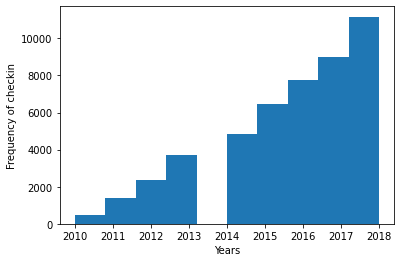

In [ ]:
plt.hist(years)
plt.xlabel("Years")
plt.ylabel("Frequency of checkin")

In [ ]:
#Resetting the index
checking_csv.reset_index(drop=True, inplace=True)

**Note: Checkin dataset will affect the total business' under consideration because we will not consider those business' where last checking was prior to 2019**

**Checking Tips dataset**

In [ ]:
# Reading tips dataset
tip_csv=pd.read_csv("/content/drive/MyDrive/csv/tip.csv")

In [ ]:
tip_csv.head()

,Unnamed: 0,user_id,business_id,text,date,compliment_count
0,0,AGNUgVwnZUey3gcPCJ76iw,3uLgwr0qeCNMjKenHJwPGQ,Avengers time with the ladies.,2012-05-18 02:17:21,0
1,1,NBN4MgHP9D3cw--SnauTkA,QoezRbYQncpRqyrLH6Iqjg,They have lots of good deserts and tasty cuban...,2013-02-05 18:35:10,0
2,2,-copOvldyKh1qr-vzkDEvw,MYoRNLb5chwjQe3c_k37Gg,It's open even when you think it isn't,2013-08-18 00:56:08,0
3,3,FjMQVZjSqY8syIO-53KFKw,hV-bABTK-glh5wj31ps_Jw,Very decent fried chicken,2017-06-27 23:05:38,0
4,4,ld0AperBXk1h6UbqmM80zw,_uN0OudeJ3Zl_tf6nxg5ww,Appetizers.. platter special for lunch,2012-10-06 19:43:09,0


In [ ]:
tip_csv.shape


(908915, 6)

**Checking reviews dataset**

In [ ]:
# Reading the review dataset
review_csv=pd.read_csv("/content/drive/MyDrive/csv/review.csv")

In [ ]:
review_csv.head()

,Unnamed: 0,review_id,user_id,business_id,stars,useful,funny,cool,text,date
0,0,KU_O5udG6zpxOg-VcAEodg,mh_-eMZ6K5RLWhZyISBhwA,XQfwVwDr-v0ZS3_CbbE5Xw,3.0,0,0,0,"If you decide to eat here, just be aware it is...",2018-07-07 22:09:11
1,1,BiTunyQ73aT9WBnpR9DZGw,OyoGAe7OKpv6SyGZT5g77Q,7ATYjTIgM3jUlt4UM3IypQ,5.0,1,0,1,I've taken a lot of spin classes over the year...,2012-01-03 15:28:18
2,2,saUsX_uimxRlCVr67Z4Jig,8g_iMtfSiwikVnbP2etR0A,YjUWPpI6HXG530lwP-fb2A,3.0,0,0,0,Family diner. Had the buffet. Eclectic assortm...,2014-02-05 20:30:30
3,3,AqPFMleE6RsU23_auESxiA,_7bHUi9Uuf5__HHc_Q8guQ,kxX2SOes4o-D3ZQBkiMRfA,5.0,1,0,1,"Wow! Yummy, different, delicious. Our favo...",2015-01-04 00:01:03
4,4,Sx8TMOWLNuJBWer-0pcmoA,bcjbaE6dDog4jkNY91ncLQ,e4Vwtrqf-wpJfwesgvdgxQ,4.0,1,0,1,Cute interior and owner (?) gave us tour of up...,2017-01-14 20:54:15


In [ ]:
review_csv.drop(['Unnamed: 0'],axis=1,inplace=True)

In [ ]:
df_group = review_csv.groupby('business_id').agg({'stars': ['mean']})

In [ ]:
df_group

,stars
,mean
business_id,
---kPU91CF4Lq2-WlRu9Lw,4.500000
--0iUa4sNDFiZFrAdIWhZQ,3.214286
--30_8IhuyMHbSOcNWd6DQ,3.555556
--7PUidqRWpRSpXebiyxTg,1.750000
--7jw19RH9JKXgFohspgQw,4.230769
...,...
zznZqH9CiAznbkV6fXyHWA,4.916667
zztOG2cKm87I6Iw_tleZsQ,4.833333


In [ ]:
review_csv.isnull().sum()/len(review_csv)

Unnamed: 0     0.0
review_id      0.0
user_id        0.0
business_id    0.0
stars          0.0
useful         0.0
funny          0.0
cool           0.0
text           0.0
date           0.0
dtype: float64

**-User Dataset**

In [ ]:
user_csv=pd.read_csv("/content/drive/MyDrive/csv/user.csv")

In [ ]:
user_csv.head()

,Unnamed: 0,user_id,name,review_count,yelping_since,useful,funny,cool,elite,friends,...,compliment_more,compliment_profile,compliment_cute,compliment_list,compliment_note,compliment_plain,compliment_cool,compliment_funny,compliment_writer,compliment_photos
0,0,qVc8ODYU5SZjKXVBgXdI7w,Walker,585,2007-01-25 16:47:26,7217,1259,5994,2007,"NSCy54eWehBJyZdG2iE84w, pe42u7DcCH2QmI81NX-8qA...",...,65,55,56,18,232,844,467,467,239,180
1,1,j14WgRoU_-2ZE1aw1dXrJg,Daniel,4333,2009-01-25 04:35:42,43091,13066,27281,"2009,2010,2011,2012,2013,2014,2015,2016,2017,2...","ueRPE0CX75ePGMqOFVj6IQ, 52oH4DrRvzzl8wh5UXyU0A...",...,264,184,157,251,1847,7054,3131,3131,1521,1946
2,2,2WnXYQFK0hXEoTxPtV2zvg,Steph,665,2008-07-25 10:41:00,2086,1010,1003,"2009,2010,2011,2012,2013","LuO3Bn4f3rlhyHIaNfTlnA, j9B4XdHUhDfTKVecyWQgyA...",...,13,10,17,3,66,96,119,119,35,18
3,3,SZDeASXq7o05mMNLshsdIA,Gwen,224,2005-11-29 04:38:33,512,330,299,"2009,2010,2011","enx1vVPnfdNUdPho6PH_wg, 4wOcvMLtU6a9Lslggq74Vg...",...,4,1,6,2,12,16,26,26,10,9
4,4,hA5lMy-EnncsH4JoR-hFGQ,Karen,79,2007-01-05 19:40:59,29,15,7,NaN,"PBK4q9KEEBHhFvSXCUirIw, 3FWPpM7KU1gXeOM_ZbYMbA...",...,1,0,0,0,1,1,0,0,0,0


**Merging datasets- review and business datasets**

In [ ]:
merged_business_review=pd.merge(review_csv,business_restaurants,on='business_id')


In [ ]:
merged_business_review.columns

In [ ]:
merged_business_review.head(5)

,review_id,user_id,business_id,stars_x,useful,funny,cool,text,date,Unnamed: 0,...,city,state,latitude,longitude,stars_y,review_count,is_open,attributes,categories,hours
0,KU_O5udG6zpxOg-VcAEodg,mh_-eMZ6K5RLWhZyISBhwA,XQfwVwDr-v0ZS3_CbbE5Xw,3.0,0,0,0,"If you decide to eat here, just be aware it is...",2018-07-07 22:09:11,1867,...,North Wales,PA,40.210196,-75.223639,3.0,169,1,"{'NoiseLevel': ""u'average'"", 'HasTV': 'False',...","Restaurants, Breakfast & Brunch, Food, Juice B...","{'Monday': '7:30-15:0', 'Tuesday': '7:30-15:0'..."
1,VJxlBnJmCDIy8DFG0kjSow,Iaee7y6zdSB3B-kRCo4z1w,XQfwVwDr-v0ZS3_CbbE5Xw,2.0,0,0,0,This is the second time we tried turning point...,2017-05-13 17:06:55,1867,...,North Wales,PA,40.210196,-75.223639,3.0,169,1,"{'NoiseLevel': ""u'average'"", 'HasTV': 'False',...","Restaurants, Breakfast & Brunch, Food, Juice B...","{'Monday': '7:30-15:0', 'Tuesday': '7:30-15:0'..."
2,S6pQZQocMB1WHMjTRbt77A,ejFxLGqQcWNLdNByJlIhnQ,XQfwVwDr-v0ZS3_CbbE5Xw,4.0,2,0,1,The place is cute and the staff was very frien...,2017-08-08 00:58:18,1867,...,North Wales,PA,40.210196,-75.223639,3.0,169,1,"{'NoiseLevel': ""u'average'"", 'HasTV': 'False',...","Restaurants, Breakfast & Brunch, Food, Juice B...","{'Monday': '7:30-15:0', 'Tuesday': '7:30-15:0'..."
3,WqgTKVqWVHDHjnjEsBvUgg,f7xa0p_1V9lx53iIGN5Sug,XQfwVwDr-v0ZS3_CbbE5Xw,3.0,0,0,0,We came on a Saturday morning after waiting a ...,2017-11-19 02:20:23,1867,...,North Wales,PA,40.210196,-75.223639,3.0,169,1,"{'NoiseLevel': ""u'average'"", 'HasTV': 'False',...","Restaurants, Breakfast & Brunch, Food, Juice B...","{'Monday': '7:30-15:0', 'Tuesday': '7:30-15:0'..."
4,M0wzFFb7pefOPcxeRVbLag,dCooFVCk8M1nVaQqcfTL3Q,XQfwVwDr-v0ZS3_CbbE5Xw,2.0,0,0,0,"Mediocre at best. The decor is very nice, and ...",2017-09-09 17:49:47,1867,...,North Wales,PA,40.210196,-75.223639,3.0,169,1,"{'NoiseLevel': ""u'average'"", 'HasTV': 'False',...","Restaurants, Breakfast & Brunch, Food, Juice B...","{'Monday': '7:30-15:0', 'Tuesday': '7:30-15:0'..."


**Merging checkin dataset with the previously review and business dataset**

In [ ]:
merged_business_review_checkin=pd.merge(checking_csv,merged_business_review,on='business_id')

In [ ]:
merged_business_review_checkin.columns

Index(['Unnamed: 0_x', 'business_id', 'date_x', 'review_id', 'user_id',
       'stars_x', 'useful', 'funny', 'cool', 'text', 'date_y', 'Unnamed: 0_y',
       'name', 'city', 'state', 'latitude', 'longitude', 'stars_y',
       'review_count', 'is_open', 'attributes', 'categories', 'hours'],
      dtype='object')

**Merging user, business,review, checkin dataset**

In [ ]:
merged_business_review_user=pd.merge(user_csv,merged_business_review_checkin,on='user_id')

In [ ]:
merged_business_review_user.shape

(197494, 45)

In [ ]:
merged_business_review_user.columns

In [ ]:
business_restaurants.columns

Index(['Unnamed: 0', 'business_id', 'name', 'city', 'state', 'latitude',
       'longitude', 'stars', 'review_count', 'is_open', 'attributes',
       'categories', 'hours'],
      dtype='object')

(-1.1049867324738167,
 1.1002374675362265,
 -1.100865862763504,
 1.1118684359543527)

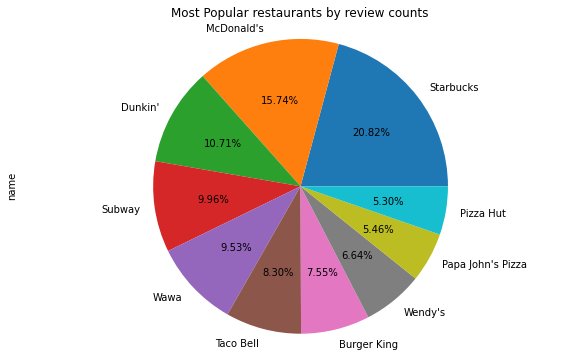

In [ ]:
business_restaurants[['name', 'review_count', 'city', 'stars']].sort_values(ascending=False, by="review_count")[0:10]
business_restaurants['name'].value_counts().sort_values(ascending=False).head(10)
business_restaurants['name'].value_counts().sort_values(ascending=False).head(10).plot(kind='pie',figsize=(10,6), 
title="Most Popular restaurants by review counts", autopct='%1.2f%%')
plt.axis('equal')

**We are visualising the most popular restaurants by review counts and we can see that Starbucks is the most popular restaurant by review counts followed by McDonald's**

Text(0.5, 1.0, 'Top 20 cities by reviews')

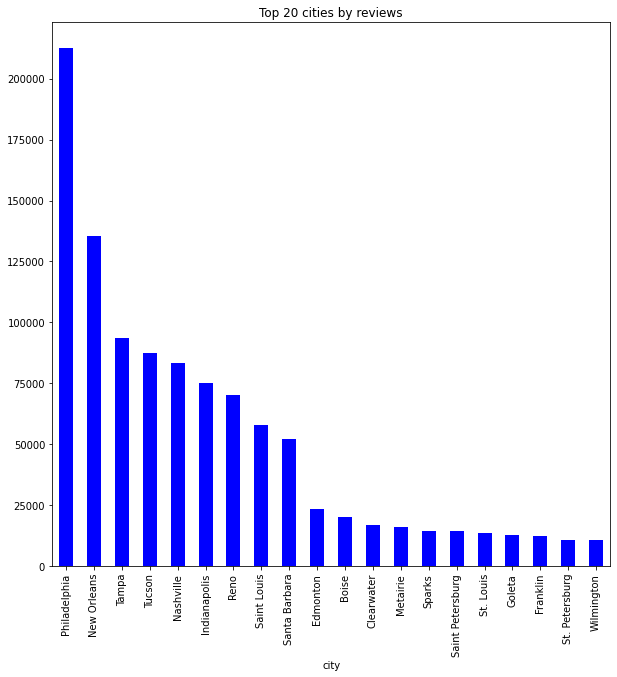

In [ ]:
city_business_reviews = business_restaurants[['city', 'review_count', 'stars']].groupby(['city']).\
agg({'review_count': 'sum', 'stars': 'mean'}).sort_values(by='review_count', ascending=False)
city_business_reviews['review_count'][0:20].plot(kind='bar', stacked=False, figsize=[10,10], \
                                                 colormap='winter')
plt.title('Top 20 cities by reviews')

**As we can see from above plot that most reviews are given from Philadelphia followed by New Orleans**

In [ ]:
city_business_reviews[:20].index

Index(['Philadelphia', 'New Orleans', 'Tampa', 'Tucson', 'Nashville',
       'Indianapolis', 'Reno', 'Saint Louis', 'Santa Barbara', 'Edmonton',
       'Boise', 'Clearwater', 'Metairie', 'Sparks', 'Saint Petersburg',
       'St. Louis', 'Goleta', 'Franklin', 'St. Petersburg', 'Wilmington'],
      dtype='object', name='city')

In [ ]:
# Finding total rating counts for each restaurant


restaurant_ratingCount = (merged_business_review_user.
     groupby(by = ['name_y'])['stars_y'].
     count().
     reset_index().
     rename(columns = {'stars_y': 'totalRatingCount'})
     [['name_y', 'totalRatingCount']]
    )
restaurant_ratingCount.head(10)

,name_y,totalRatingCount
0,'nanaSplits,11
1,1 Stop Mini Market,6
2,1 Stop Pizza,8
3,10 Johnson Avenue,65
4,1000 Degrees Neapolitan Pizzeria,35
5,101 Bridge,13
6,104St Grill,9
7,10Below Ice Cream,9
8,12 ACRES Restaurant,58
9,12 South Bistro,30


**Merging datafrane with totalRatingCounts dataframe**

In [ ]:
rating_with_totalRatingCount = merged_business_review_user.merge(restaurant_ratingCount, on = 'name_y')

In [ ]:
rating_with_totalRatingCount.columns

In [ ]:
# We will filter the records to only the top 10 cities just to avoid any computation and memory-related interruption.

us_city_user_rating_modified=rating_with_totalRatingCount[rating_with_totalRatingCount['city'].str.contains("Philadelphia|New Orleans|Tampa|Tucson|Nashville|Indianapolis|Reno|Saint Louis|Santa Barbara|Edmonton")]

In [ ]:
# We will keep only those restaurants where totalRatingCount is in 90th percentile

populatity_threshold = rating_with_totalRatingCount['totalRatingCount'].quantile(0.90)

In [ ]:
rating_popular_rest = rating_with_totalRatingCount.query('totalRatingCount >= @populatity_threshold')
rating_popular_rest.shape

(19901, 46)

In [ ]:
us_city_user_rating = rating_popular_rest[rating_popular_rest['city'].str.contains("Philadelphia|New Orleans|Tampa|Tucson|Nashville|Indianapolis|Reno|Saint Louis|Santa Barbara|Edmonton")]

In [ ]:
us_city_user_rating.columns

Index(['Unnamed: 0', 'user_id', 'name_x', 'review_count_x', 'yelping_since',
       'useful_x', 'funny_x', 'cool_x', 'elite', 'friends', 'fans',
       'average_stars', 'compliment_hot', 'compliment_more',
       'compliment_profile', 'compliment_cute', 'compliment_list',
       'compliment_note', 'compliment_plain', 'compliment_cool',
       'compliment_funny', 'compliment_writer', 'compliment_photos',
       'Unnamed: 0_x', 'business_id', 'date_x', 'review_id', 'stars_x',
       'useful_y', 'funny_y', 'cool_y', 'text', 'date_y', 'Unnamed: 0_y',
       'name_y', 'city', 'state', 'latitude', 'longitude', 'stars_y',
       'review_count_y', 'is_open', 'attributes', 'categories', 'hours',
       'totalRatingCount'],
      dtype='object')

In [ ]:
us_city_user_rating.head()

,Unnamed: 0,user_id,name_x,review_count_x,yelping_since,useful_x,funny_x,cool_x,elite,friends,...,state,latitude,longitude,stars_y,review_count_y,is_open,attributes,categories,hours,totalRatingCount
665,18,QF1Kuhs8iwLWANNZxebTow,Catherine,607,2009-04-27 20:25:54,4573,3714,4149,"2010,2011,2012,2013,2014,2015,2016,2017,2018,2...","dLts9bY66tXEFqYG03YFgw, SYDGMC7d5NnMiT1l_WQq5A...",...,CA,34.423943,-119.704944,4.0,1024,0,"{'BusinessAcceptsCreditCards': 'True', 'Outdoo...","Restaurants, Breakfast & Brunch, American (Tra...","{'Monday': '8:0-14:0', 'Tuesday': '17:0-20:0',...",1037
666,58,OmjMNG77obZOKQ59o-Tx4Q,Jenna,556,2008-11-16 05:10:49,606,248,326,"2010,2011,2012,2013,2014,2015,2016","kN4A5jI8pzSmo6q-gAto1A, HtCPdVujYJAZF4FKr-C9Lg...",...,CA,34.423943,-119.704944,4.0,1024,0,"{'BusinessAcceptsCreditCards': 'True', 'Outdoo...","Restaurants, Breakfast & Brunch, American (Tra...","{'Monday': '8:0-14:0', 'Tuesday': '17:0-20:0',...",1037
667,251,7Na1pUcEv3oF_QTRwZ-2iw,Amanda,839,2011-10-23 23:52:25,2611,1349,2129,"2012,2013","dr_mce0J8Q-BLLOA23KuAQ, ET4ofpMbYZs2lXYDz7jqmA...",...,CA,34.423943,-119.704944,4.0,1024,0,"{'BusinessAcceptsCreditCards': 'True', 'Outdoo...","Restaurants, Breakfast & Brunch, American (Tra...","{'Monday': '8:0-14:0', 'Tuesday': '17:0-20:0',...",1037
668,285,YWFbTcVnun8i03XnEU7kVg,Craig,762,2008-10-30 23:49:18,12577,10855,11674,"2009,2010,2011,2012,2013","QtT8tBXKhZI3Ehe4oUfbGw, EtQEvwXvzvpde4hDerT6cA...",...,CA,34.423943,-119.704944,4.0,1024,0,"{'BusinessAcceptsCreditCards': 'True', 'Outdoo...","Restaurants, Breakfast & Brunch, American (Tra...","{'Monday': '8:0-14:0', 'Tuesday': '17:0-20:0',...",1037
669,380,fCMxArYY8wSWxKuM27azrg,Michelle,164,2008-05-11 04:41:25,253,140,121,"2008,2009","-SlWJhzUzqUO61vJoKYbOA, ce5aiZyL4LJ7xknxUhvgQA...",...,CA,34.423943,-119.704944,4.0,1024,0,"{'BusinessAcceptsCreditCards': 'True', 'Outdoo...","Restaurants, Breakfast & Brunch, American (Tra...","{'Monday': '8:0-14:0', 'Tuesday': '17:0-20:0',...",1037


In [ ]:
us_city_user_rating = us_city_user_rating.drop_duplicates(['user_id', 'name_x'])
restaurant_features = us_city_user_rating.pivot(index = 'name_y', columns = 'user_id', values = 'stars_y').fillna(0)

**We have the name of restaurants as indicies and columns as user_ids**

In [ ]:
restaurant_features.head()

user_id,--5t79VnMbzUeoaOmpMoOg,--KQJPdrU0Md97DiOliDzw,--RYw4T-D2GlTSXqn1VBag,--u09WAjW741FdfkJXxNmg,-0-ufVVBqB64vpLtoFQZrA,-0zuLfG_GPKUz-xLeFwpvQ,-11dIiDQtZjr4vlH7BNb_Q,-13RX4Gy_F-zoLIenWAo-w,-2iqRtc6w1AXjVhT3CKuwg,-3HYmxW_5Gsg4I0eH3ju-Q,...,zwg1FDVSrofkJFjRDcQXIQ,zx4c7K-1eBSvEmUg7zqiZQ,zxCOwzZmH1s0KbQbhPIdBw,zxwYim3EmIbYFhgTr9EqBg,zyNrXvJyYdC34tS6BcCykA,zySfwbIHPNhLR8-JiqGdWA,zygj7nRfUhVvMpmaET-TaQ,zz5IHe3r6TIpXBGjQy8m7A,zz9wGVLClSDHoklHoj2g8w,zzBhA0M7NNBMYoWj48h53A
name_y,,,,,,,,,,,,,,,,,,,,,
500 Degrees,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Blackbird Pizzeria,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
Burger King,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Café Adelaide,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Coulis,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


**We transform the values(restaurant_rating) of the matrix data frame into a scipy sparse matrix for more efficient calculations.**

In [ ]:
restaurant_features_matrix = csr_matrix(restaurant_features.values)

# **Implementing KNN algorithm for recommedations**

In [ ]:
from sklearn.neighbors import NearestNeighbors

In [ ]:
knn_recomm = NearestNeighbors(metric = 'cosine', algorithm = 'brute')
knn_recomm.fit(restaurant_features_matrix)

In [ ]:
randomChoice = np.random.choice(restaurant_features.shape[0])
distances, indices = knn_recomm.kneighbors(restaurant_features.iloc[randomChoice].values.reshape(1, -1), n_neighbors = 11)

for i in range(0, len(distances.flatten())):
    if i == 0:
        print('Recommendations for Restaurant {0} on priority basis:\n'.format(restaurant_features.index[randomChoice]))
    else:
        print('{0}: {1}'.format(i, restaurant_features.index[indices.flatten()[i]]))

Recommendations for Restaurant Holland House Bar & Refuge on priority basis:

1: Scotty's Brewhouse
2: Sir Veza's Taco Garage
3: Papa John's Pizza
4: Pei Wei
5: Piquant
6: Pizza Hut
7: Reef Sushi & Sake
8: Sbraga
9: Paesano's Philly Style
10: The Blue Duck


We have got nearest 10 recommendations to the restaurant: **Holland House Bar & Refuge**

# **Implementing Stochastic gradient descent**

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
userid_rating_matrix = pd.pivot_table(us_city_user_rating, values='stars_y', index=['user_id'], columns=['business_id'])
userid_rating_matrix.shape

(14593, 135)

In [ ]:
userid_df = us_city_user_rating[['user_id','text']]

In [ ]:
import string
from nltk.corpus import stopwords
stop = []
for word in stopwords.words('english'):
    s = [char for char in word if char not in string.punctuation]
    stop.append(''.join(s))

In [ ]:
def text_process(mess):
    # Check characters to see if they are in punctuation
    nopunc = [char for char in mess if char not in string.punctuation]

    # Join the characters again to form the string.
    nopunc = ''.join(nopunc)
    
    # Now just remove any stopwords
    return " ".join([word for word in nopunc.split() if word.lower() not in stop])


In [ ]:
userid_df = userid_df.groupby('user_id').agg({'text': ' '.join})

In [ ]:
userid_df.head()

,text
user_id,
--5t79VnMbzUeoaOmpMoOg,"Yeah Jeremy, Chris, Vanessa, and the rest of t..."
--KQJPdrU0Md97DiOliDzw,Forget the Cheesesteak as the signature sandwi...
--RYw4T-D2GlTSXqn1VBag,45 minutes into dinner and I've yet to see one...
--u09WAjW741FdfkJXxNmg,Piquant is a quaint French restaurant and bake...
-0-ufVVBqB64vpLtoFQZrA,"By far the best, most unique, coolest sushi jo..."


In [ ]:
from nltk.tokenize import WordPunctTokenizer

In [ ]:
userid_vectorizer = TfidfVectorizer(tokenizer = WordPunctTokenizer().tokenize, max_features=5000)
userid_vectors = userid_vectorizer.fit_transform(userid_df['text'])
userid_vectors.shape

(14593, 5000)

In [ ]:
business_df_modified = us_city_user_rating[['business_id', 'text']]

In [ ]:
business_df_modified = business_df_modified.groupby('business_id').agg({'text': ' '.join})

In [ ]:
business_df_modified.head()

,text
business_id,
-e8idMo1i2j6AUyKm-UBzQ,This is a Subway within a Walmart. Nothing out...
-vSkeoIujNpKhITwvcYVLw,"Typical Starbucks here... busy time, and still..."
0R2yKDNMUztQwgo8pG4z-Q,If you're the kind of person who enjoys hookin...
0WrdiQ4qJBu2Gc7wRcIfdw,We called in an hour before coming in for brun...
0yN1rxCrEKqQIUk-nqyWVw,This is the worst Subway.\n\nThe location:\n- ...


In [ ]:
#Business id vectorizer
businessid_vectorizer = TfidfVectorizer(tokenizer = WordPunctTokenizer().tokenize, max_features=5000)
businessid_vectors = businessid_vectorizer.fit_transform(business_df_modified['text'])
businessid_vectors.shape

(135, 5000)

In [ ]:
userid_rating_matrix = pd.pivot_table(us_city_user_rating, values='stars_y', index=['user_id'], columns=['business_id'])
userid_rating_matrix.shape

(14593, 135)

In [ ]:
P = pd.DataFrame(userid_vectors.toarray(), index=userid_df.index, columns=userid_vectorizer.get_feature_names())
Q = pd.DataFrame(businessid_vectors.toarray(), index=business_df_modified.index, columns=businessid_vectorizer.get_feature_names())

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
def matrix_factorization(R, P, Q, steps=25, gamma=0.001,lamda=0.02):
    for step in range(steps):
        for i in R.index:
            for j in R.columns:
                if R.loc[i,j]>0:
                    eij=R.loc[i,j]-np.dot(P.loc[i],Q.loc[j])
                    P.loc[i]=P.loc[i]+gamma*(eij*Q.loc[j]-lamda*P.loc[i])
                    Q.loc[j]=Q.loc[j]+gamma*(eij*P.loc[i]-lamda*Q.loc[j])
        e=0
        for i in R.index:
            for j in R.columns:
                if R.loc[i,j]>0:
                    e= e + pow(R.loc[i,j]-np.dot(P.loc[i],Q.loc[j]),2)+lamda*(pow(np.linalg.norm(P.loc[i]),2)+pow(np.linalg.norm(Q.loc[j]),2))
        if e<0.001:
            break
        
    return P,Q

In [ ]:
%%time
P, Q = matrix_factorization(userid_rating_matrix, P, Q, steps=25, gamma=0.001,lamda=0.02)

CPU times: user 47min 45s, sys: 1min 18s, total: 49min 4s
Wall time: 46min 54s


In [ ]:
Q.head()

,!,!!,!!!,!!!!,!!!!!,!!!!!!,!!!!!!!,"!""",!),"!),",...,yum,yummy,yup,zawzeech,zero,zing,zone,zucchini,~,étouffée
business_id,,,,,,,,,,,,,,,,,,,,,
-e8idMo1i2j6AUyKm-UBzQ,0.123962,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
-vSkeoIujNpKhITwvcYVLw,0.116637,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.025585,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
0R2yKDNMUztQwgo8pG4z-Q,0.359728,0.036718,0.052421,0.001424,0.00000,0.000000,0.006715,0.009352,0.053802,0.005827,...,0.013925,0.027862,0.002132,0.0,0.016173,0.000000,0.003327,0.003818,0.000000,0.0
0WrdiQ4qJBu2Gc7wRcIfdw,1.062243,0.221665,0.116369,0.049930,0.00621,0.008057,0.008741,0.001851,0.052317,0.009161,...,0.193338,0.202589,0.002683,0.0,0.017405,0.007282,0.000000,0.000886,0.033221,0.0
0yN1rxCrEKqQIUk-nqyWVw,0.033478,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0


In [ ]:
Q.iloc[0].sort_values(ascending=False).head(10)

.          0.396578
a          0.381164
subway     0.352222
the        0.321963
he         0.276655
was        0.252645
,          0.237697
and        0.226834
#          0.162997
wearing    0.161019
Name: -e8idMo1i2j6AUyKm-UBzQ, dtype: float64

In [ ]:
P.iloc[0].sort_values(ascending=False).head(10)

boss         0.259366
chris        0.254564
raise        0.247418
hire         0.242502
deserve      0.238463
crew         0.235541
'            0.198138
starbucks    0.193828
the          0.190071
i            0.188533
Name: --5t79VnMbzUeoaOmpMoOg, dtype: float64

In [ ]:
words = "i want to have coffee"
test_df= pd.DataFrame([words], columns=['text'])
test_df['text'] = test_df['text'].apply(text_process)
test_vectors = userid_vectorizer.transform(test_df['text'])
test_v_df = pd.DataFrame(test_vectors.toarray(), index=test_df.index, columns=userid_vectorizer.get_feature_names())

predictItemRating=pd.DataFrame(np.dot(test_v_df.loc[0],Q.T),index=Q.index,columns=['Rating'])
topRecommendations=pd.DataFrame.sort_values(predictItemRating,['Rating'],ascending=[0])[:7]

for i in topRecommendations.index:
    print(business_csv[business_csv['business_id']==i]['name'].iloc[0])
    print(business_csv[business_csv['business_id']==i]['categories'].iloc[0])
    print(str(business_csv[business_csv['business_id']==i]['stars'].iloc[0])+ ' '+str(business_csv[business_csv['business_id']==i]['review_count'].iloc[0]))
    print('')

Piquant
Food, Bakeries, French, Restaurants, Breakfast & Brunch, Coffee & Tea
4.0 500

Little Pete's Restaurant
Restaurants, Diners, Breakfast & Brunch, Sandwiches
3.5 324

Starbucks
Food, Coffee & Tea, Restaurants
4.5 31

Coulis
Restaurants, Breakfast & Brunch, Sandwiches, Asian Fusion, Burgers
4.0 342

Tupelo Junction Cafe
Restaurants, Breakfast & Brunch, American (Traditional), American (New), Southern
4.0 1024

Starbucks
Food, Coffee & Tea
3.0 50

Starbucks
Food, Coffee & Tea
4.0 8



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


**Here based on the reviews inside the text column, we will get most similar recommendations of restaurants**